In [1]:
import os
os.chdir("../../../")

In [2]:
import torch
from torchts.nn.models.ode import ODESolver
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
# Duffing equation: Second order ODE system
dt = 0.01

def x_prime(prev_val, coeffs):
    return coeffs["a"]*torch.cos(coeffs["w"]*prev_val["t"])

def t_prime(prev_val, coeffs):
    return 1

ode = {"x": x_prime, "t": t_prime}

# Initial conditions [0,0,0]
ode_init = {"x": 0, "t": 0}

# Constants (Parameters)
ode_coeffs = {"a": 3., "w": 5.}


# 4th Order Runge-Kutta - Data Generation for nt = 1000

In [4]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=None
)

result = ode_solver(1000)

In [5]:
result

tensor([[ 0.0000,  0.0000],
        [ 0.0300,  0.0100],
        [ 0.0599,  0.0200],
        ...,
        [-0.2418,  9.9701],
        [-0.2140,  9.9801],
        [-0.1858,  9.9901]], grad_fn=<StackBackward>)

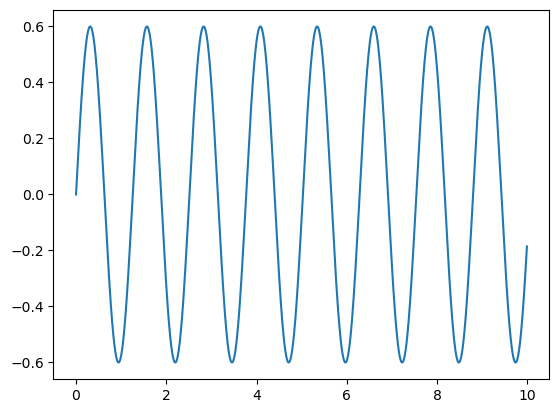

In [6]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,1], result_np[:,0])

plt.show()

# Euler's method for training

In [7]:
ode_train_coeffs = {"a": 1.,"w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

In [8]:
ode_solver_train.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.5},
    max_epochs=50,
    scheduler=torch.optim.lr_scheduler.MultiStepLR,
    scheduler_params={"milestones": [20],"gamma": 0.2}
)

Epoch: 0	 Loss: tensor(8.3987e-05, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.3543, requires_grad=True), 'w': Parameter containing:
tensor(0.1630, requires_grad=True)}
Epoch: 1	 Loss: tensor(2.3275e-05, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.4782, requires_grad=True), 'w': Parameter containing:
tensor(0.2951, requires_grad=True)}
Epoch: 2	 Loss: tensor(1.0188e-06, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-0.1041, requires_grad=True), 'w': Parameter containing:
tensor(1.0689, requires_grad=True)}
Epoch: 3	 Loss: tensor(7.2948e-05, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-0.6632, requires_grad=True), 'w': Parameter containing:
tensor(0.5962, requires_grad=True)}
Epoch: 4	 Loss: tensor(1.2538e-05, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.2057, requires_grad=True), 'w': Parameter containing:
tensor(-0.1034, requires_grad=True)}
Epoch: 5	 Loss: tensor(0.0002, grad_fn=<MseLossBackw

In [9]:
ode_solver_train.coeffs

{'a': Parameter containing:
 tensor(-0.7897, requires_grad=True),
 'w': Parameter containing:
 tensor(16.7366, requires_grad=True)}

# Predictions for nt=1000

In [10]:
results_test = ode_solver_train(1000)
results_test

tensor([[ 0.0000e+00,  0.0000e+00],
        [-7.8974e-03,  1.0000e-02],
        [-1.5684e-02,  2.0000e-02],
        ...,
        [ 9.0370e-03,  9.9701e+00],
        [ 1.6422e-02,  9.9801e+00],
        [ 2.3238e-02,  9.9901e+00]], grad_fn=<StackBackward>)

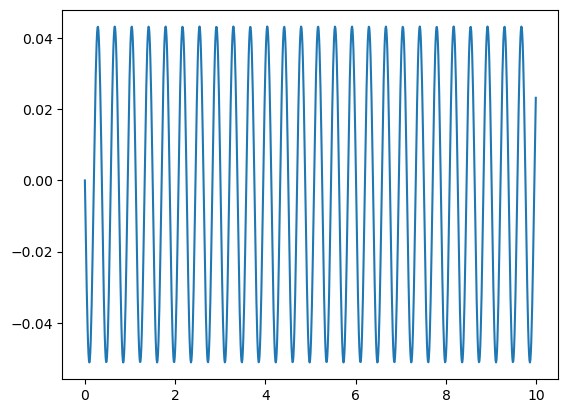

In [11]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,1], results_test_np[:,0])

plt.show()

# Runge-Kutta for training

In [12]:
ode_train_coeffs = {"a": 1.,"w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=None
)

In [13]:
ode_solver_train.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.5},
    max_epochs=50,
    scheduler=torch.optim.lr_scheduler.MultiStepLR,
    scheduler_params={"milestones": [20],"gamma": 0.2}
)

Epoch: 0	 Loss: tensor(9.1289e-05, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-0.0290, requires_grad=True), 'w': Parameter containing:
tensor(2.5714, requires_grad=True)}
Epoch: 1	 Loss: tensor(0.0002, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.4045, requires_grad=True), 'w': Parameter containing:
tensor(0.6908, requires_grad=True)}
Epoch: 2	 Loss: tensor(0.0002, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(-1.3988, requires_grad=True), 'w': Parameter containing:
tensor(-0.1943, requires_grad=True)}
Epoch: 3	 Loss: tensor(0.0002, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.5274, requires_grad=True), 'w': Parameter containing:
tensor(-1.9835, requires_grad=True)}
Epoch: 4	 Loss: tensor(0.0005, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(1.6118, requires_grad=True), 'w': Parameter containing:
tensor(-3.7478, requires_grad=True)}
Epoch: 5	 Loss: tensor(0.0001, grad_fn=<MseLossBackward>)
{'a': Pa

In [14]:
ode_solver_train.coeffs

{'a': Parameter containing:
 tensor(-0.0989, requires_grad=True),
 'w': Parameter containing:
 tensor(-2.9269, requires_grad=True)}

# Predictions for nt = 1000

In [15]:
results_test = ode_solver_train(1000)
results_test

tensor([[ 0.0000e+00,  0.0000e+00],
        [-9.8864e-04,  1.0000e-02],
        [-1.9764e-03,  2.0000e-02],
        ...,
        [ 2.6607e-02,  9.9701e+00],
        [ 2.7204e-02,  9.9801e+00],
        [ 2.7779e-02,  9.9901e+00]], grad_fn=<StackBackward>)

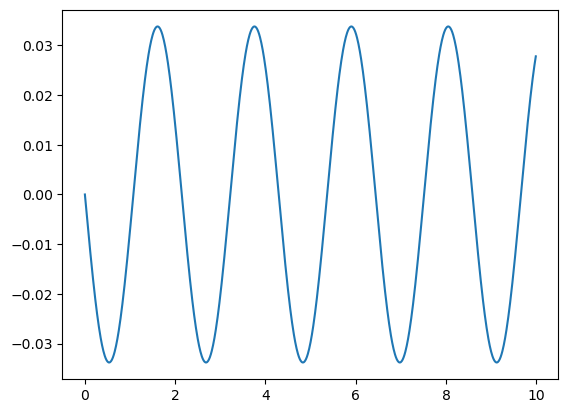

In [16]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,1], results_test_np[:,0])

plt.show()